# logistic regression 

* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.

* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).

* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.

* Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.

* Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification.

# the general equation for logistic regression is 

### Ax  + Bx + C = 0 
 
 
### IF YOU WANT TO SEE HOW CHANGE IN  EITHER A OR B OR C WILL AFFECT THE LINE :

CHECK OUT THE LINK  : 

#### https://www.desmos.com/calculator/mwzod7hhyu

 Logistic regression is primarily used for classification tasks, not regression tasks, despite its name. It is a statistical model used to predict the probability of a binary or categorical outcome based on input features. It is one of the fundamental techniques for binary classification.

In logistic regression, the dependent variable is a binary variable (0 or 1) that represents the two possible classes or categories. The goal is to find the relationship between the input features (independent variables) and the probability of belonging to a particular class.

The logistic regression model uses the logistic function (also called the sigmoid function) to map the linear combination of input features to a value between 0 and 1. The output of the logistic function represents the predicted probability of the sample belonging to the positive class. A threshold (typically 0.5) is used to classify the samples into the respective classes.

Although the term "regression" is used in the name, logistic regression is a classification algorithm rather than a regression algorithm. If you have a regression task (predicting a continuous numerical value), other regression techniques such as linear regression or polynomial regression would be more appropriate.

In [10]:
## tables of contens :

# logistic regression
# the general euquation for logistic regression
# the simpler and expand formula for the desicion boundary
# logistic regression perceptron trick


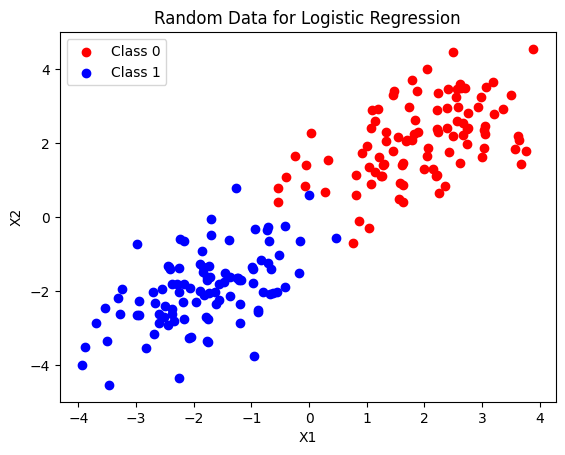

In [1]:
## let me show you first how do we do this on logitic regression

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Number of samples for each class
num_samples = 100

# Generate random data for class 0
x0 = np.random.multivariate_normal([2, 2], [[1, .5], [.5, 1]], num_samples)
y0 = np.zeros(num_samples)

# Generate random data for class 1
x1 = np.random.multivariate_normal([-2, -2], [[1, .5], [.5, 1]], num_samples)
y1 = np.ones(num_samples)

# Concatenate the data and labels
X = np.vstack((x0, x1))
y = np.concatenate((y0, y1))

# Plot the generated data
plt.scatter(x0[:, 0], x0[:, 1], c='r', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='Class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Data for Logistic Regression')
plt.legend()
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.2 , random_state =25)

In [3]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()

model1.fit(X_train , y_train)

LogisticRegression()

In [4]:
y_pred = model1.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


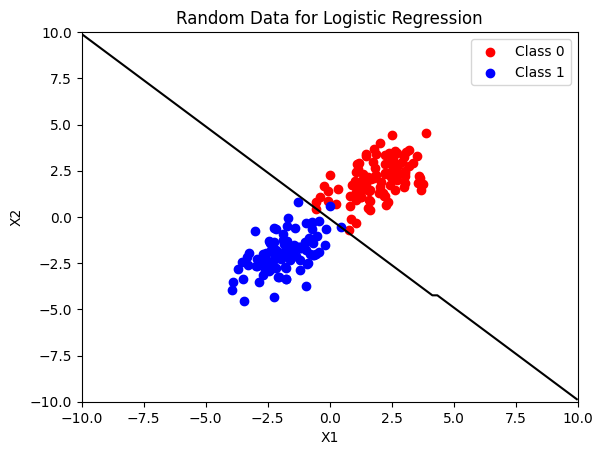

In [28]:
# Plot the generated data
plt.scatter(x0[:, 0], x0[:, 1], c='r', label='Class 0')
plt.scatter(x1[:, 0], x1[:, 1], c='b', label='Class 1')

# Create a meshgrid of points across the feature space
x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-10, 10, 100)
X_mesh, Y_mesh = np.meshgrid(x_vals, y_vals)
points = np.c_[X_mesh.ravel(), Y_mesh.ravel()]

# Make predictions on the meshgrid points using the trained model
Z = model1.predict(points)
Z = Z.reshape(X_mesh.shape)

# Plot the decision boundary
plt.contour(X_mesh, Y_mesh, Z, levels=[0.5], colors='black')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Random Data for Logistic Regression')
plt.legend()
plt.show()

### instead of writing the equation like this 

### Ax  + Bx + C = 0 

### we write it like this 


## The formula for the desicion boundary in logistic regression

### w 0  + w1 x 1 + w2 x2 = 0 

where : 
* w0 =c 
* w1 = a 
* w2 = b
* the x are the features

but we can simplif it more :

we add  1 before the first feautre or column in X_train and then the equation will be like :

### w 0 x 0 + w 1 x1 + w2 x 2 = 0  

where we add a bias as 1 

this is basically this 

### sigma of i to ncolumns or nfeatures * wi x i = 0 


Instead of:
w1x1 + w2x2 = 0

It becomes:
w0 + w1x1 + w2x2 = 0

In this case, the bias term w0 is added as a separate feature with a constant value of 1, and the corresponding weight w0 is multiplied by 1.

To represent this in a more general form, where xi represents the ith feature and wi represents the corresponding weight, the logistic regression equation becomes:

w0x0 + w1x1 + w2x2 + ... + wnxn = 0

Here, x0 is the bias term, which is always set to 1, and w0 is the weight associated with the bias term.

The sigma symbol you mentioned (∑) is used to represent the summation of the products of weights and features across all features. So, the logistic regression equation can be written using sigma notation as:

∑(wi*xi) = 0

This equation represents the linear combination of the features multiplied by their corresponding weights, summed together, and equal to zero.

Please note that the specific notation and convention may vary depending on the context or textbook. It's important to refer to the specific notation or equation format used in the material you are studying or following.

## logistic regression perceptron trick 

In [31]:
from sklearn.datasets import make_classification
import numpy as np
x, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [32]:
x[0]

array([ 0.51123145, -0.11697552])

In [33]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

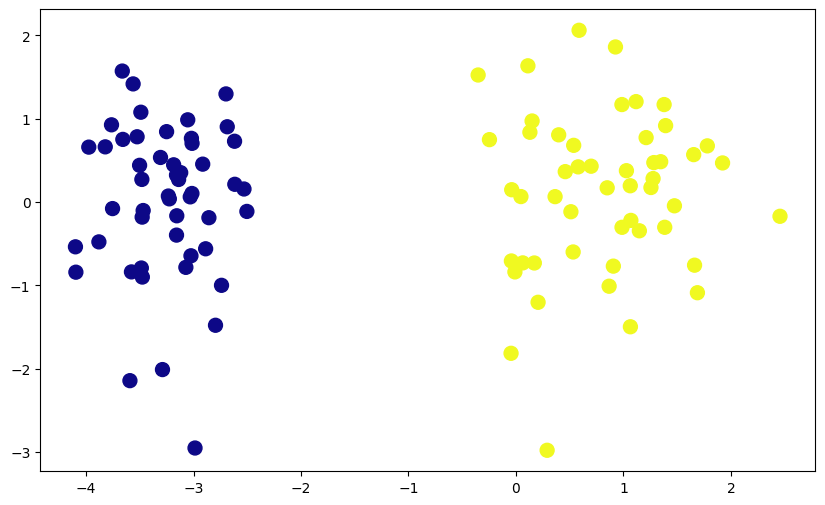

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='plasma',s=100)

# the target columns or y is 1 or 0  here yellow is 1 and blue is zero

In [35]:
def perceptron(x,y):
     # first we add 1 at the 0 index for the bias 
    X = np.insert(x,0,1,axis=1)
    
    # now we add weights array  with the same size or shape as X 
    # it will look something like this ([1 , 1 , 1]) where the first 1 is the bias
    # the second is the slope and the last is the y_intercept
    weights = np.ones(X.shape[1])
    # initialise learning rate
    lr = 0.1
    
     # now we runt the epochs 1000 times
    for i in range(1000):
         # we then select a random numbers between zero and hundred as the shape of our X is 100 , 2
        j = np.random.randint(0,100)
         #  then we find the y_hat or the predicted step basically return 1 if z > 0 else 0
        y_hat = step(np.dot(X[j],weights))
        
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [36]:
# this is an example fo what will happen the 't' represents the 'x' here and 41 here is  j and 1 , 1  , 1  are the weights
t =  np.insert(x,0,1,axis=1)
np.dot(t[41] ,[1, 1 , 1 ])

-1.40369174748523

In [37]:
# this if for the weights which is the above code where we plus weigths
# with learning_rate * y [j] - y_hat) * x[j] 
[1 , 1 , 1] + 0.1 * (y[43] - 0.294600090803674 ) * t[41]

array([1.07053999, 0.81545858, 1.01498502])

In [38]:
def step(z):
    return 1 if z > 0 else 0 

In [39]:
intercept_ , coef_ = perceptron(x , y)

In [40]:
print(coef_)
print(intercept_)

[1.0580085  0.40381514]
1.2000000000000002


In [41]:
# lets plot it but first we need to find m and b 
# now we have Ax + bx +v = 0 
# we can bring it down to y = mx + b

# m = -a[0] / b[1] 
# c = -c(intercept) / b[1]

m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [42]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b


(-3.0, 2.0)

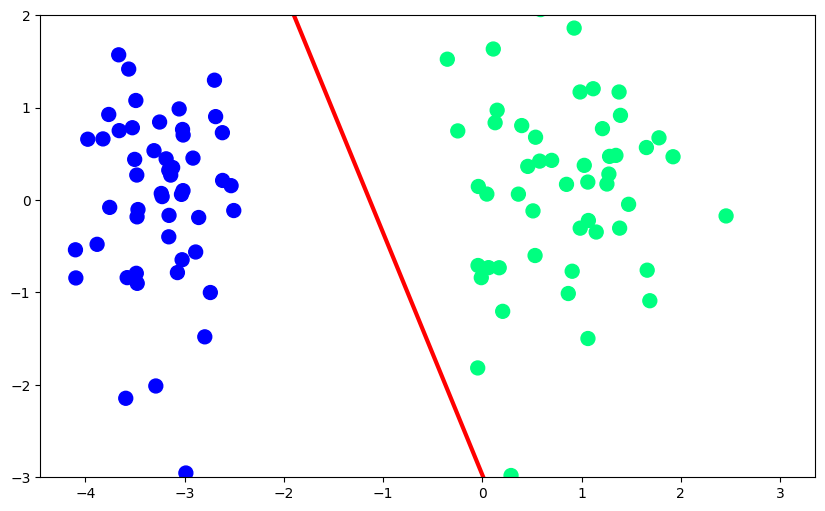

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)


# decision boundary animation 

###  you can check the animation on the file app.py


In [44]:
# now lets see how the scikit learn logistic regression works 

from sklearn.linear_model import LogisticRegression 

model1 = LogisticRegression()
model1.fit(x, y)

LogisticRegression()

In [45]:
m = -(model1.coef_[0][0] / model1.coef_[0][1])
b = -(model1.intercept_/ model1.coef_[0][1])

In [46]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b


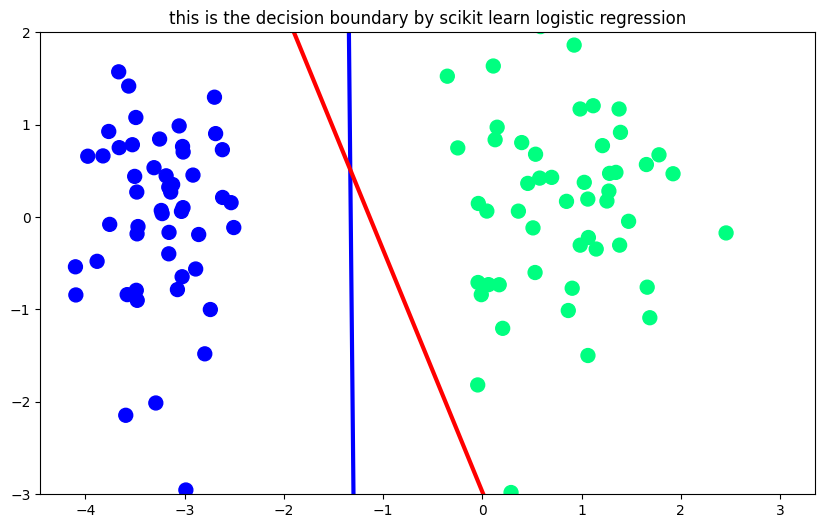

In [52]:
plt.figure(figsize=(10,6))
plt.plot(x_input1, y_input1, color='blue', linewidth=3)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0], x[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3, 2)
plt.title("this is the decision boundary by scikit learn logistic regression")
plt.show()

# here

## we can clearly see that there is a differnce but which one is correct

the scikit learn logistic regression which is the blue one  is correct  and the one i build with 'set' is inocorrect because im using set instead of sigmoid 

we can see that the red line is more diagonal and the blue line is straight 
seeing this we can say that the blue line will perform better on the test data 

so how do we fix this 

we can use the sigmoid function and push the red line 

if correctly classified it will push 
if incorrectly classified it will pull 

if incorrectly classified are near the line it will pull little bit 
if incorrectly classified are far  the line it will pull more  

if correctly classified are near the line it will push more 
if incorrectly classifiedfar from the line  it will push little 

line here is the decision boundary



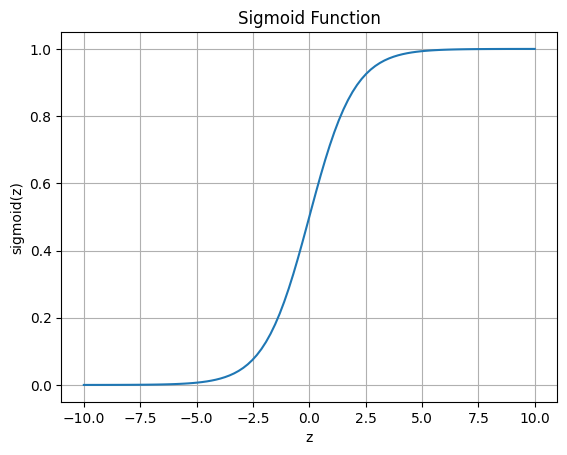

In [57]:
# in this case we use the sigmoid function 

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z
z = np.linspace(-10, 10, 100)

# Compute sigmoid values for each z
a = sigmoid(z)

# Plot the sigmoid function
plt.plot(z, a)
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

### in order for this to work we can use the SIGMOID FUNCTION

The sigmoid function is a commonly used activation function in logistic regression. It is defined as:

a = 1 / (1 + exp(-z)) 

IN THE SIGMOID FUNCTION NO MATTER WHAT INPUT YOU GIVE TO THIS FUNCTION THE OUTPUT WILL ALWAYS BE IN THE RANGE OF  0 TO 1 

### so before sigmoid what we did was we updated the predicted  using 

w1 x1 + w2 x2 + w_not or w0 and then we pass it into the step function 

def step(z):
    return 1 if z > 0 else 0 
    
then we would get the output 

rather than using this step we can replace it with the sigmoid function 


we can also look at sigmoid as a probability for eg 

Let's consider a simple example where we use logistic regression to predict whether a student will pass an exam based on the number of hours they studied. We can assume that the sigmoid function outputs a probability of 0.5 for a particular student, indicating an equal chance of passing or failing the exam.

In [75]:
hours_studied = 5
weights = np.array([0.5])  # Weight parameter for hours studied
bias = np.array([2.5])    # Bias parameter (modified to make probability increase)

# Calculate z (input to the sigmoid function)
z = np.dot(hours_studied, weights) + bias

# Apply the sigmoid function
probability = sigmoid(z)

print("Probability of passing the exam:", probability)

Probability of passing the exam: [0.99330715]


In this example, we assume that the weight parameter for hours studied is 0.5, and the bias parameter is -2.5. We then calculate the input to the sigmoid function, z, by taking the dot product of the hours studied and the weights, and adding the bias term. Finally, we apply the sigmoid function to z to obtain the probability of passing the exam.

If the resulting probability is 0.5, it means there is an equal chance of passing or failing the exam based on the given number of hours studied.

the more it is to the negative the less Probability of passing the exam 

and the more to the positive the more  Probability of passing the exam